# Scalar field Z

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np
import matplotlib as mpl


In [4]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)


In [5]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['savefig.pad_inches'] = 0.0
mpl.rcParams['figure.subplot.hspace'] = 0
mpl.rcParams['figure.subplot.wspace'] = 0
mpl.rcParams['figure.subplot.left'] = 0.075


In [6]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z


In [7]:
import warnings
warnings.filterwarnings('ignore')


## Definition of variables

In [8]:
radius = 3*mm

xin = np.linspace(-radius, radius, 4096)
xout = np.linspace(-150 * um, 150 * um, 128)

wavelength = 550 * nm

focal = 250 * mm
z = focal


In [9]:

t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal, radius=radius)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0*u0


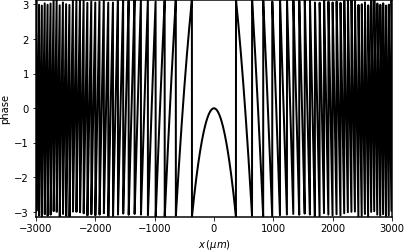

In [10]:
u1.draw('phase')


In [11]:
print(u1)


Scalar_field_X
 - x:  (4096,),   u:  (4096,)
 - xmin:       -3000.00 um,  xmax:      3000.00 um,  Dx:   1.47 um
 - Imin:       0.00,     Imax:      1.00
 - phase_min:  -179.70 deg, phase_max: 179.92 deg
 - wavelength: 0.55 um
 - date:       2022-09-28_16_54_25



## CZT algorithm

In [16]:
%%time
zs = np.linspace(focal - 50 * mm, focal + 50 * mm, 1024)
u_z = Scalar_field_Z(z=zs, wavelength=wavelength, info='z axis')


x_origin = 0
for i, z in enumerate(zs):
    u_z.u[i] = u1.CZT(z, 0)
    print("{} {} {}".format(i, z, np.abs(u_z.u[i])), end="\r")


CPU times: user 3.4 s, sys: 2.38 ms, total: 3.4 s
Wall time: 3.39 s


## Scalar z

DOF = 6.64 mm


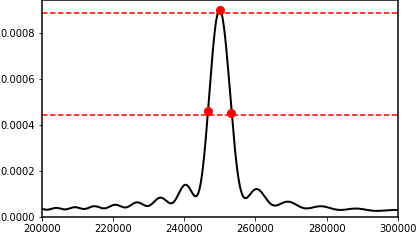

In [30]:
dof=u_z.FWHM1D(percentage=0.5, remove_background=True, has_draw=True)
print("DOF = {:2.2f} mm".format(dof/mm))


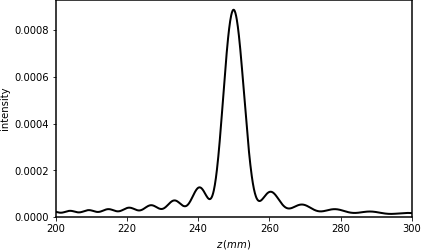

In [17]:
u_z.draw(z_scale='mm')


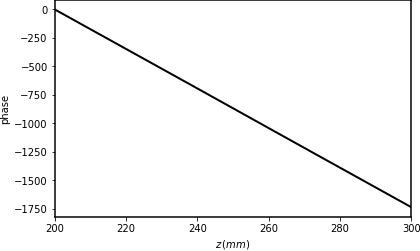

In [31]:
u_z.draw('phase', z_scale='mm', unwrap=True)


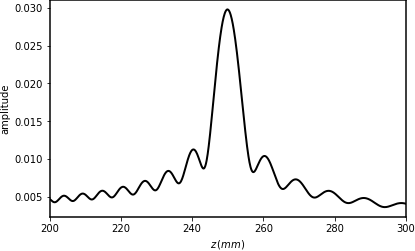

In [19]:
u_z.draw('amplitude', z_scale='mm')


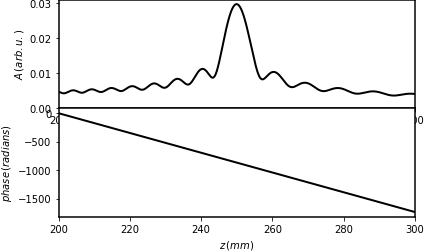

In [20]:
u_z.draw('field', z_scale='mm', unwrap=True)
